In [1]:
%reload_ext autoreload
%autoreload 2
import tie.dbutils as db
import tie.utils as qa
import pandas as pd
from scipy.io import savemat, loadmat
import json
from tqdm import tqdm
import os
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import DivergingNorm, TwoSlopeNorm, Normalize
from statsmodels.stats.multitest import fdrcorrection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

In [2]:
version = 'v6_IRLS'

In [3]:
all_age_res = loadmat(f'../../all_age_gender_log_{version}.mat')['all_age_gender'][0]  # 4 structs for 4 JIDs

In [4]:
data_it = all_age_res[0].flat[0][0].flat[0]

mask_full = data_it[0][-1][0]
mdl = data_it[2]
r2_full = np.zeros(2500)

for j, obj in enumerate(mdl):
    pixel = obj.flat[0][0][0]
    r2_full[j] = pixel[0][0][0]

valid_points = np.sign(mask_full).squeeze() * r2_full

In [67]:
idxs = np.where(valid_points > 0.5)[0]
len(idxs)

128

In [68]:
np.mean(valid_points[idxs])

0.612852541964785

In [69]:
data_it = all_age_res[0].flat[0][0].flat[0]
A = data_it[3].squeeze()
print(A.shape)
B = data_it[4][:, 0].squeeze()
print(B.shape)

(515, 2500)
(515,)


In [87]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

N = len(B)

r_idxs = np.random.permutation(N)
X = A[r_idxs][:, idxs]
y = B[r_idxs]

clf = SVR(C=1000, kernel='rbf')
scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_absolute_error')
print(np.mean(scores))

-6.075877026875257


In [82]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

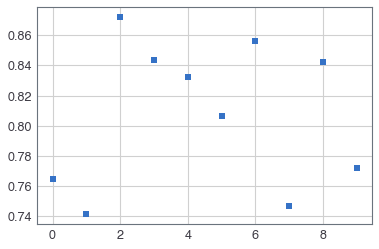

In [72]:
plt.plot(scores, 's')

In [78]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0)

scores = cross_val_score(regr, X, y, cv=10, scoring='r2')
print(np.mean(scores))

0.7873202962519862


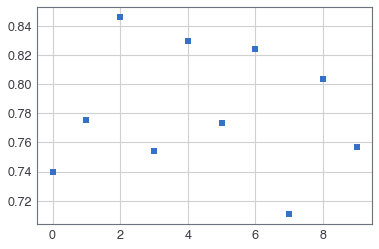

In [77]:
plt.plot(scores, 's')